# Introduction

QA plots for the TPC detector

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 


# Initialization

In [31]:
import uproot
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

# 2D Field map export

In [4]:
MapFile2D = '/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sPHENIX.2d.root'

# 2D field map scaling on its working point
# https://github.com/ECCE-EIC/macros/blob/prop.7.0/detectors/EICDetector/Fun4All_G4_EICDetector.C#L460 
magfield_2D_rescale = -1.4 / 1.5;

In [5]:
file = uproot.open(MapFile2D)

In [6]:
file.keys()

['fieldmap;1', 'h1;1']

In [7]:
file['fieldmap'].keys()

['r', 'z', 'br', 'bz']

In [8]:
df_fieldmap = file['fieldmap'].arrays(library="pd")

df_fieldmap['br'] = df_fieldmap['br'].apply(lambda x: x * magfield_2D_rescale)
df_fieldmap['bz'] = df_fieldmap['bz'].apply(lambda x: x * magfield_2D_rescale)

In [9]:
df_fieldmap

,r,z,br,bz
0,300.0,400.0,0.004610,-0.002614
1,298.0,400.0,0.004837,-0.002521
2,296.0,400.0,0.005066,-0.002391
3,294.0,400.0,0.005322,-0.002253
4,292.0,400.0,0.005585,-0.002108
...,...,...,...,...
60546,8.0,-400.0,-0.002663,0.007943
60547,6.0,-400.0,-0.002007,0.008361
60548,4.0,-400.0,-0.001348,0.008561
60549,2.0,-400.0,-0.000696,0.008769


In [10]:

X=df_fieldmap['z'].values
Y=df_fieldmap['r'].values
Z=df_fieldmap.apply(lambda x: np.sqrt(x['br']*x['br'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


## Check field map plot

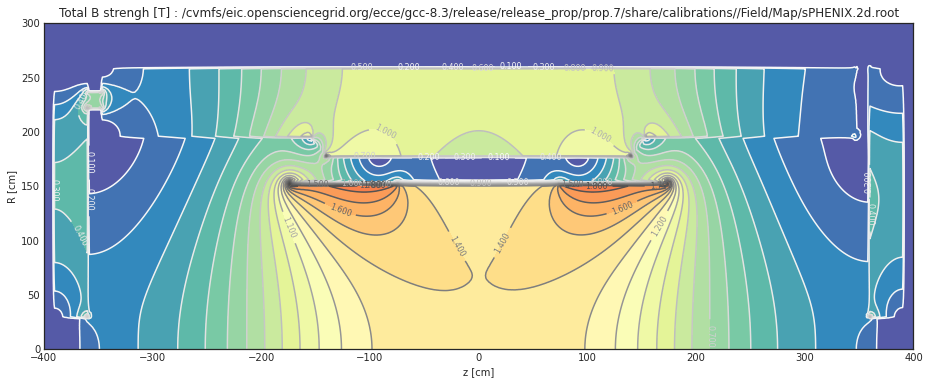

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('R [cm]')
ax.set_title("Total B strengh [T] : " + MapFile2D)

fig.show()

In [12]:
df_fieldmap.to_csv('sPHENIX.2d.csv');

# 3D field map

In [13]:
MapFile3D = '/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sphenix3dbigmapxyz.root'

In [14]:
file = uproot.open(MapFile3D)

In [15]:
file.keys()

['fieldmap;13', 'fieldmap;12']

In [16]:
file['fieldmap'].keys()

['x', 'y', 'z', 'bx', 'by', 'bz', 'hz']

In [17]:
df_fieldmap = file['fieldmap'].arrays(library="pd")

In [18]:
df_fieldmap

,x,y,z,bx,by,bz,hz
0,-270.0,-270.0,-330.0,0.001434,0.001430,-0.002762,-0.002762
1,-270.0,-270.0,-328.0,0.001390,0.001386,-0.002795,-0.002795
2,-270.0,-270.0,-326.0,0.001345,0.001341,-0.002826,-0.002826
3,-270.0,-270.0,-324.0,0.001299,0.001295,-0.002855,-0.002855
4,-270.0,-270.0,-322.0,0.001252,0.001248,-0.002881,-0.002881
...,...,...,...,...,...,...,...
24308966,270.0,270.0,322.0,0.001292,0.001240,-0.003005,-0.003005
24308967,270.0,270.0,324.0,0.001341,0.001289,-0.002977,-0.002977
24308968,270.0,270.0,326.0,0.001389,0.001338,-0.002947,-0.002947
24308969,270.0,270.0,328.0,0.001436,0.001385,-0.002915,-0.002915


In [19]:
df_fieldmap_yz = df_fieldmap[df_fieldmap['x'] == 0]

In [20]:
df_fieldmap_yz

,x,y,z,bx,by,bz,hz
12109635,0.0,-270.0,-330.0,0.000137,0.009904,-0.092114,-0.092114
12109636,0.0,-270.0,-328.0,0.000332,0.005110,-0.095648,-0.095648
12109637,0.0,-270.0,-326.0,0.000301,0.000888,-0.091804,-0.091804
12109638,0.0,-270.0,-324.0,0.000270,-0.004503,-0.089257,-0.089257
12109639,0.0,-270.0,-322.0,0.000258,-0.010979,-0.088455,-0.088455
...,...,...,...,...,...,...,...
12199331,0.0,270.0,322.0,0.000173,-0.010986,-0.090137,-0.090137
12199332,0.0,270.0,324.0,0.000142,-0.004388,-0.090975,-0.090975
12199333,0.0,270.0,326.0,0.000133,0.001115,-0.093587,-0.093587
12199334,0.0,270.0,328.0,0.000149,0.005438,-0.097469,-0.097469


In [21]:

X=df_fieldmap_yz['z'].values
Y=df_fieldmap_yz['y'].values
Z=df_fieldmap_yz.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


## Check field map plot

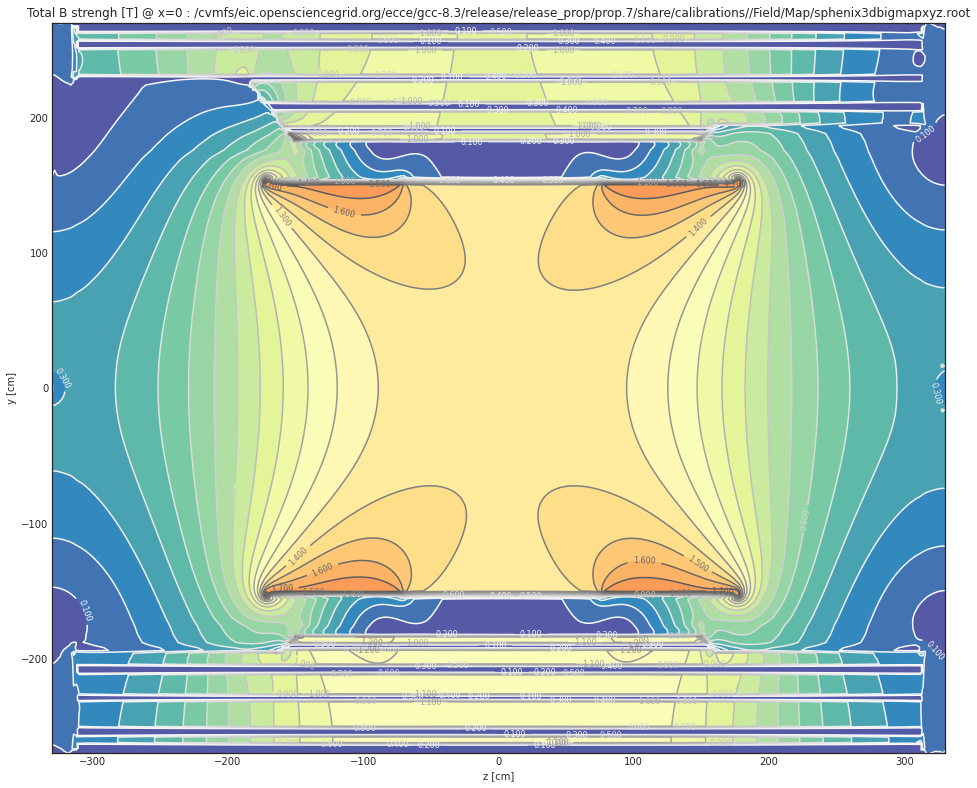

In [22]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)

fig.show()

In [23]:
df_fieldmap.to_csv('sphenix3dbigmapxyz.csv');

## In steel vs out of steel

In [24]:
df_fieldmap_xy = df_fieldmap[df_fieldmap['z'] == 0]
X=df_fieldmap_xy['x'].values
Y=df_fieldmap_xy['y'].values
Z=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

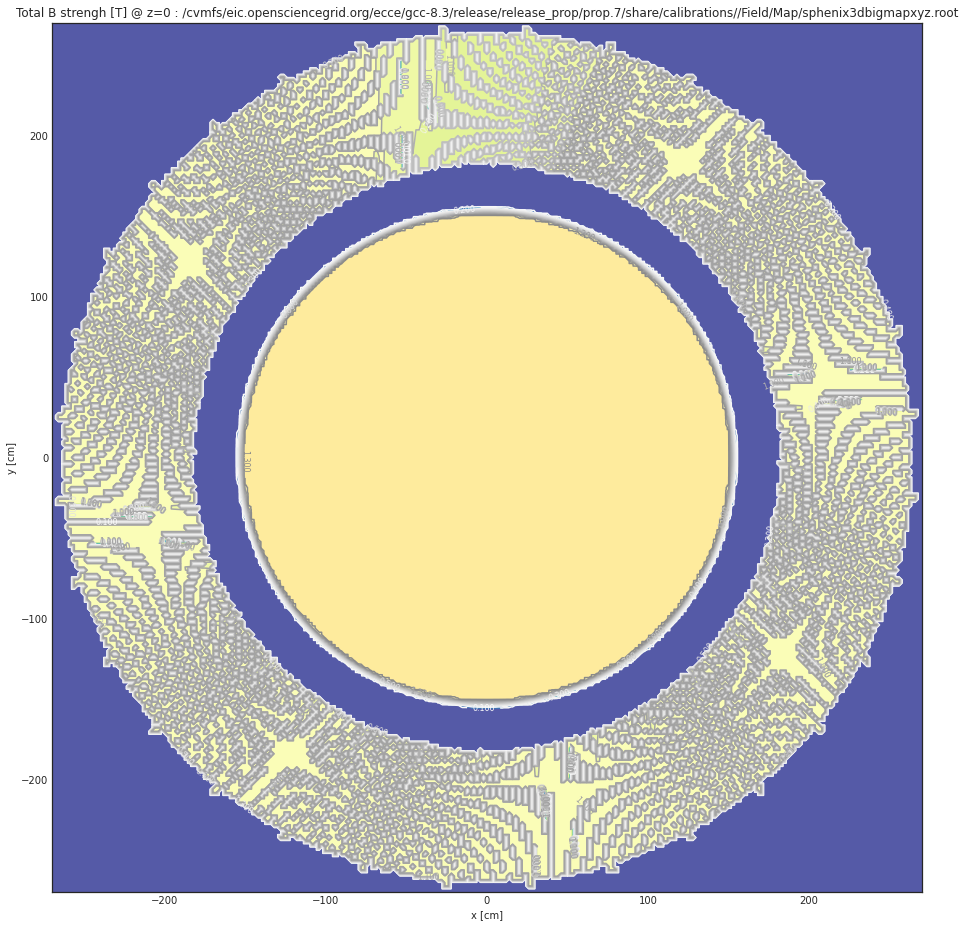

In [25]:
limits =  np.arange(0,2.5,.1);

fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ z=0 : " + MapFile3D)

fig.show()

In [26]:
df_fieldmap_xy['phi_fmod'] = df_fieldmap_xy.apply(lambda x: np.fmod(np.arctan2(x['y'], x['x']) + np.pi, 2.*np.pi/64.), axis=1)

<ipython-input-26-a079ffced1a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fieldmap_xy['phi_fmod'] = df_fieldmap_xy.apply(lambda x: np.fmod(np.arctan2(x['y'], x['x']) + np.pi, 2*np.pi/64), axis=1)


In [34]:
df_fieldmap_xy['X_fold']=df_fieldmap_xy.apply(lambda x: np.cos(x['phi_fmod'])*np.sqrt(x['x']*x['x'] + x['y']*x['y']), axis=1)
df_fieldmap_xy['Y_fold']=Y=df_fieldmap_xy.apply(lambda x: np.sin(x['phi_fmod'])*np.sqrt(x['x']*x['x'] + x['y']*x['y']), axis=1)
df_fieldmap_xy['B_tot']=Z=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1)


limits =  np.arange(0,2.5,.1);

<ipython-input-34-2f9180640263>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fieldmap_xy['X_fold']=df_fieldmap_xy.apply(lambda x: np.cos(x['phi_fmod'])*np.sqrt(x['x']*x['x'] + x['y']*x['y']), axis=1)
<ipython-input-34-2f9180640263>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fieldmap_xy['Y_fold']=Y=df_fieldmap_xy.apply(lambda x: np.sin(x['phi_fmod'])*np.sqrt(x['x']*x['x'] + x['y']*x['y']), axis=1)
<ipython-input-34-2f9180640263>:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

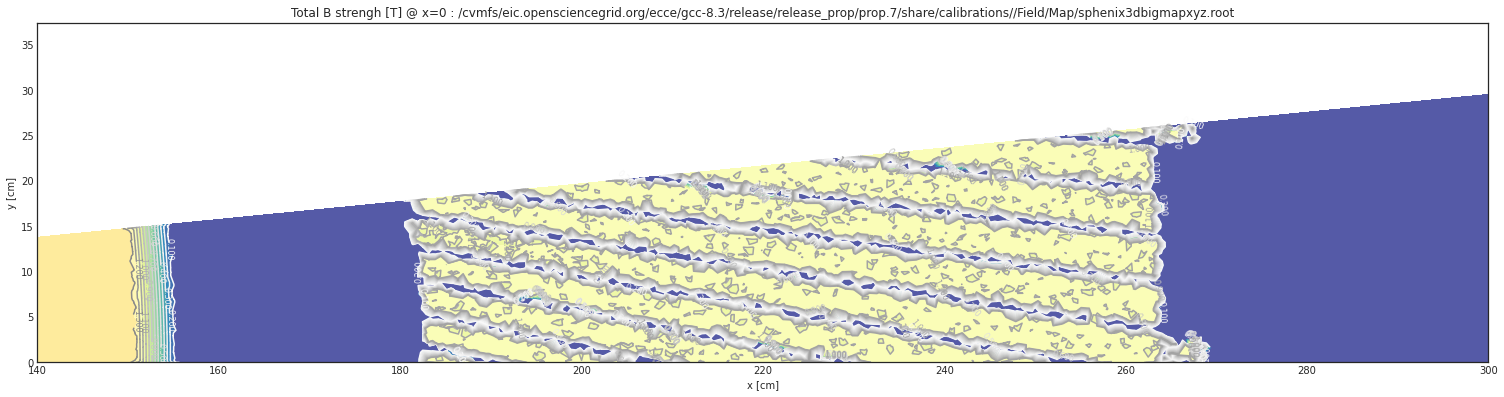

In [78]:
fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.tricontourf(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)
ax.set_xlim([140, 300])

fig.show()

In [29]:
df_fieldmap_xy

,x,y,z,bx,by,bz,hz,phi_fmod
165,-270.0,-270.0,0.0,0.000046,0.000040,-0.001267,-0.001267,9.817476e-02
496,-270.0,-268.0,0.0,0.000046,0.000040,-0.001263,-0.001263,9.445734e-02
827,-270.0,-266.0,0.0,0.000047,0.000040,-0.001259,-0.001259,9.071226e-02
1158,-270.0,-264.0,0.0,0.000047,0.000041,-0.001254,-0.001254,8.693929e-02
1489,-270.0,-262.0,0.0,0.000048,0.000041,-0.001250,-0.001250,8.313818e-02
...,...,...,...,...,...,...,...,...
24307481,270.0,262.0,0.0,0.000003,-0.000093,-0.001259,-0.001259,8.313833e-02
24307812,270.0,264.0,0.0,0.000004,-0.000092,-0.001263,-0.001263,8.693932e-02
24308143,270.0,266.0,0.0,0.000006,-0.000091,-0.001267,-0.001267,9.071223e-02
24308474,270.0,268.0,0.0,0.000007,-0.000091,-0.001271,-0.001271,9.445731e-02


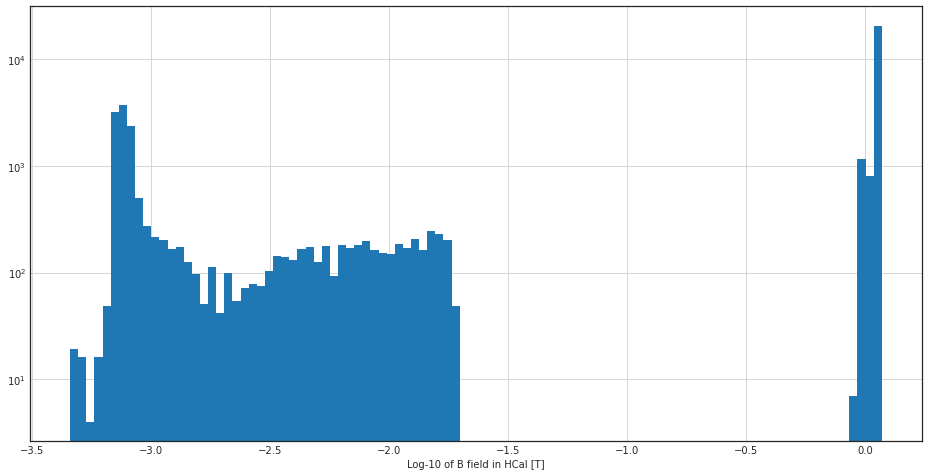

In [64]:
fig, ax = plt.subplots(figsize=(16,8))

hist = df_fieldmap_xy[(df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)].apply(lambda x: np.log10(x['B_tot']), axis=1).hist(bins=100)
ax.set_xlabel('Log-10 of B field in HCal [T]');
ax.set_yscale('log')


In [75]:
df_fieldmap_xy_steel = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] > 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]
df_fieldmap_xy_gap = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] < 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]

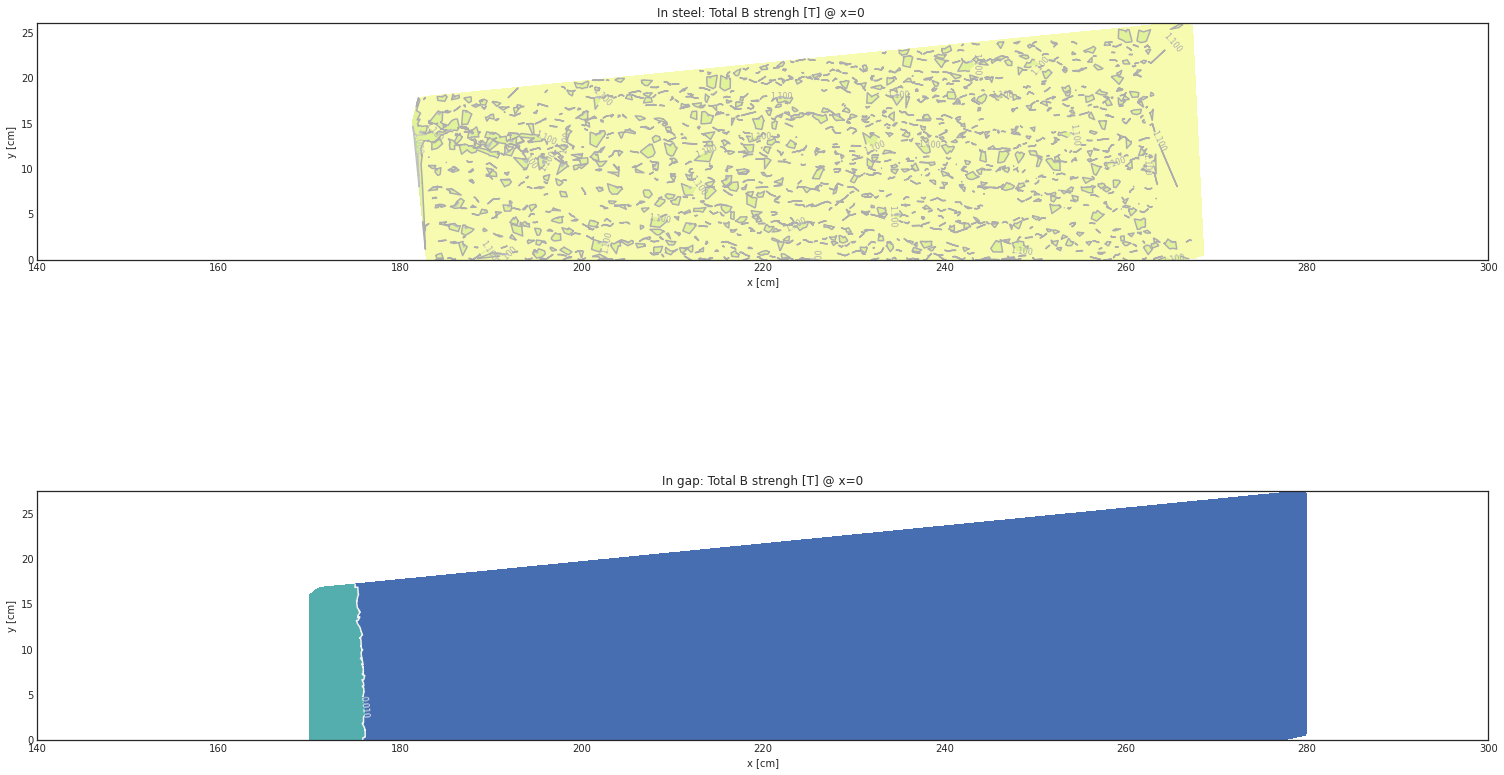

In [79]:
fig, axs = plt.subplots(2, 1, figsize=(26,16))

ax = axs[0];

limits =  np.arange(.5,2,.1);
ax.set_aspect('equal')
ax.tricontourf(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ x=0 " )
ax.set_xlim([140, 300])

ax = axs[1];

limits =  np.arange(0,.1,.01);
ax.set_aspect('equal')
ax.tricontourf(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In gap: Total B strengh [T] @ x=0")
ax.set_xlim([140, 300])

fig.show()